# Consistency Check with BasicAutoencodix Tutorial

In [1]:
import os

p = os.getcwd()
d = "autoencodix_package"
if d not in p:
    raise FileNotFoundError(f"'{d}' not found in path: {p}")
os.chdir(os.sep.join(p.split(os.sep)[: p.split(os.sep).index(d) + 1]))
print(f"Changed to: {os.getcwd()}")


Changed to: /Users/maximilianjoas/development/autoencodix_package


In [8]:
from autoencodix.utils.example_data import EXAMPLE_MULTI_SC
import os
from autoencodix.configs.varix_config import VarixConfig
from autoencodix.configs.default_config import DataCase, DataConfig, DataInfo
import autoencodix as acx

# Varix has its own config class
# with an additional loss term: either Kullback-Leibler (KL) or Maximum Mean Discrepancy (MMD)
# Instead of passing a pandas DataFrame, we use a pre-defined DataPackage object directly,
# this time with single-cell data.
rna_file = os.path.join("data", "raw", "combined_rnaseq_formatted.parquet")
meth_file = os.path.join("data", "raw", "combined_meth_formatted.parquet")
anno_file = os.path.join("data", "raw", "combined_clin_formatted.parquet")

print("Input data:")
print(EXAMPLE_MULTI_SC)
print("-" * 50)
data_config = DataConfig(
    annotation_columns=[  # Parameters to colorize plots and perform embedding evaluatio
        "CANCER_TYPE",
        "CANCER_TYPE_ACRONYM",
        "TMB_NONSYNONYMOUS",
        "AGE",
        "SEX",
        "GRADE",
        "OS_STATUS",
    ],
    data_info={
        "meth": DataInfo(
            file_path=meth_file,
            data_type="NUMERIC",
            scaling="STANDARD",
            translate_direction="to",
        ),
        "rna": DataInfo(
            file_path=rna_file,
            data_type="NUMERIC",
            scaling="STANDARD",
            translate_direction="from",
        ),
        "anno": DataInfo(file_path=anno_file, data_type="ANNOTATION", sep="\t"),
    },
)

my_config = VarixConfig(
    learning_rate=0.0005,
    data_config=data_config,
    batch_size=128,
    drop_p=0.1,
    k_filter=1000,
    epochs=500,
    checkpoint_interval=25,
    beta=0.5,
    device="cpu",
    reconstruction_loss="mse",
    latent_dim=6,
    default_vae_loss="kl",  # 'kl' or 'mmd' possible
    data_case=DataCase.MULTI_BULK,
    requires_paired=True,
)

print("\nStarting Pipeline")
print("-" * 50)
varix = acx.Varix(config=my_config)
result = varix.run()


Input data:
multi_sc:
  multi_sc: 1000 samples × 700 features
--------------------------------------------------

Starting Pipeline
--------------------------------------------------
reading parquet: data/raw/combined_meth_formatted.parquet
reading parquet: data/raw/combined_rnaseq_formatted.parquet
reading parquet: data/raw/combined_clin_formatted.parquet
anno key: paired
Epoch 1 - Train Loss: 1119.0429
Sub-losses: recon_loss: 1119.0423, var_loss: 0.0006, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 1168.2276
Sub-losses: recon_loss: 1168.1693, var_loss: 0.0583, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 1038.1705
Sub-losses: recon_loss: 1038.1467, var_loss: 0.0238, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 1065.5351
Sub-losses: recon_loss: 1065.5334, var_loss: 0.0018, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 997.7101
Sub-losses: recon_loss: 997.7083, var_los

Creating plots ...


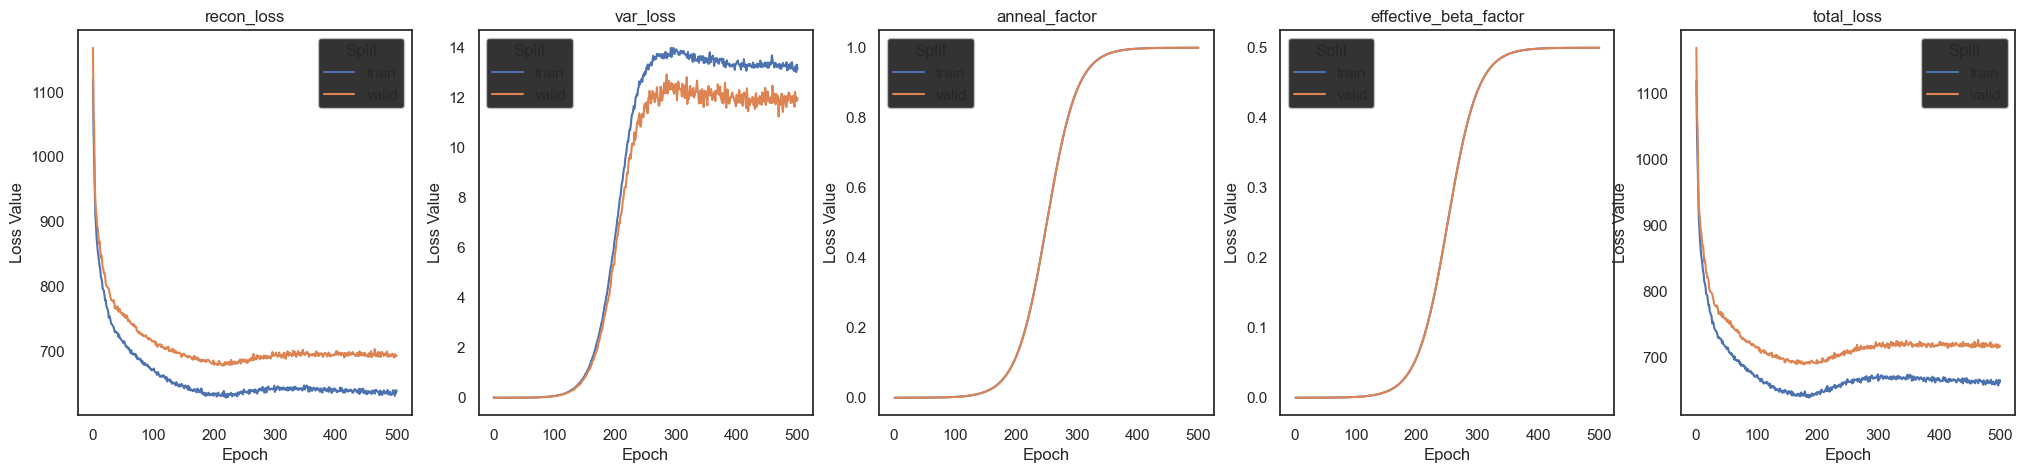

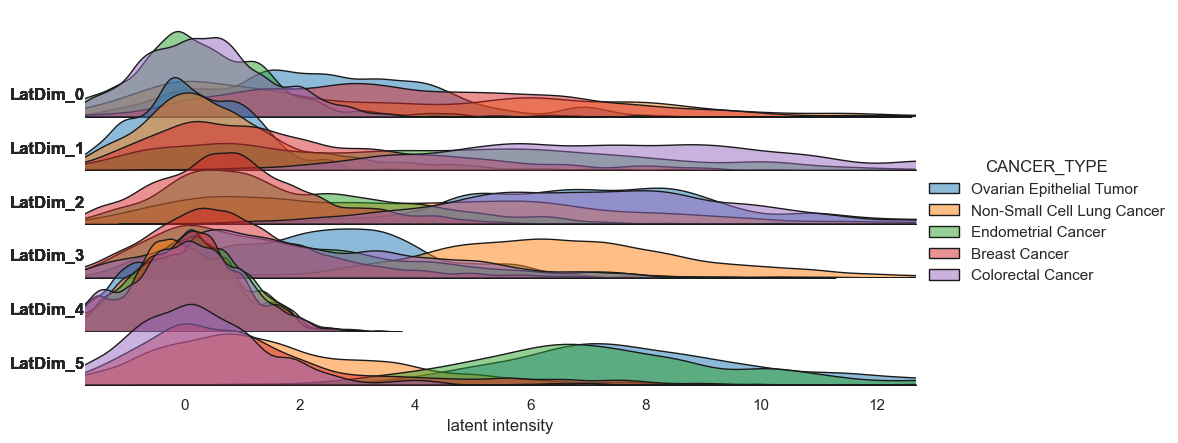

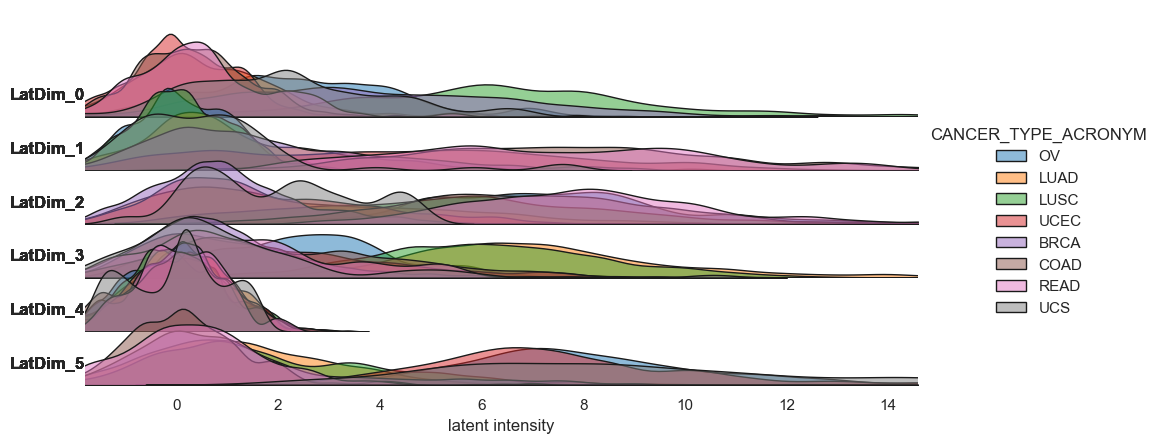

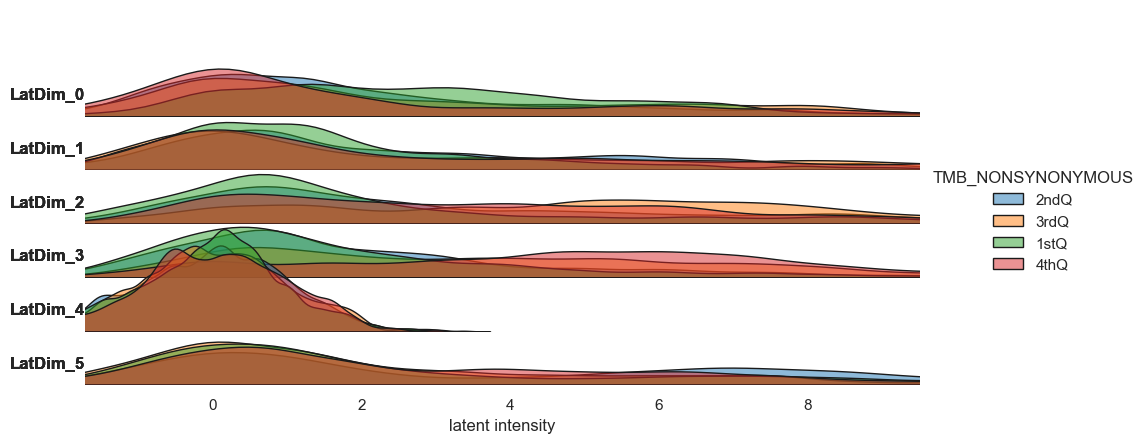

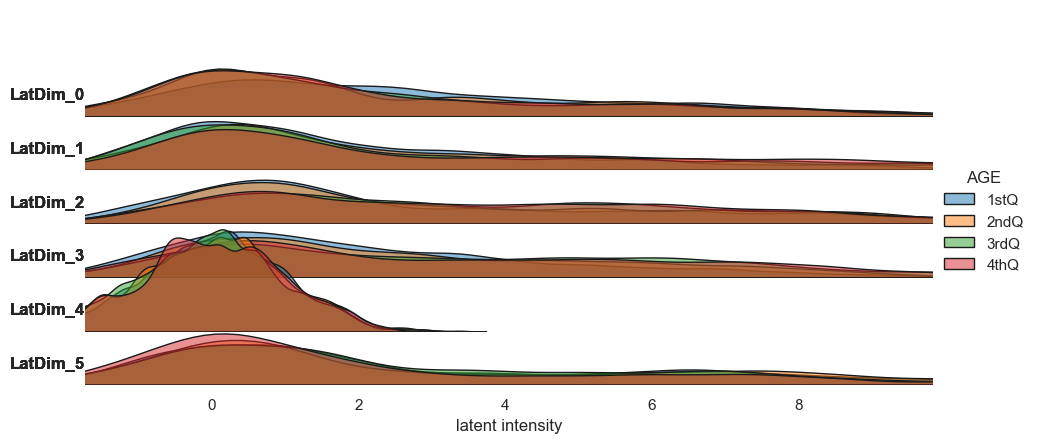

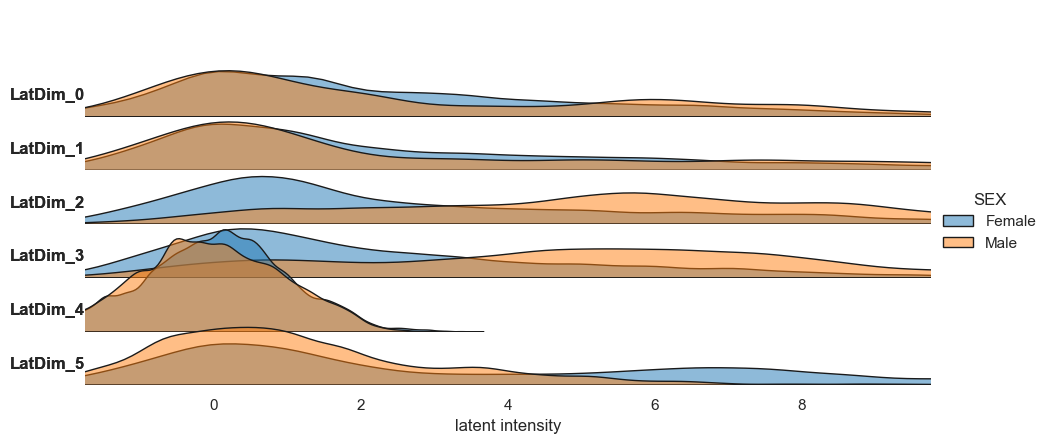

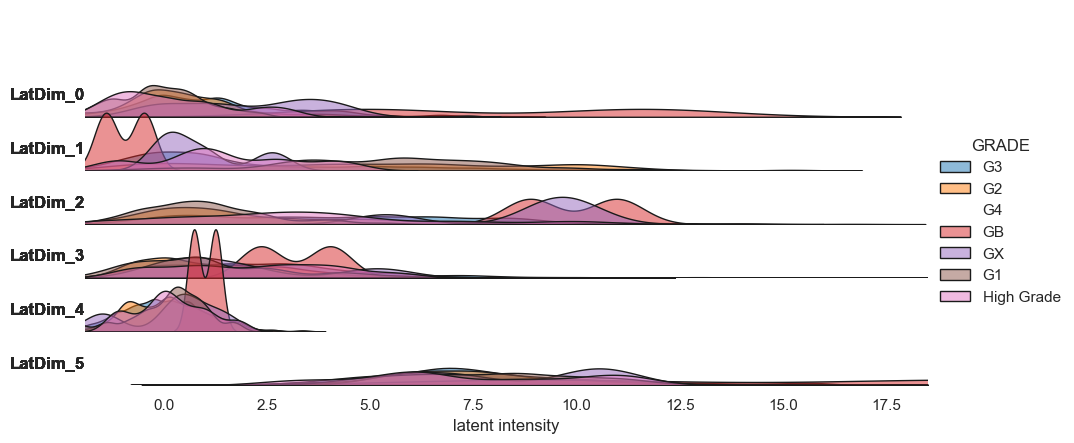

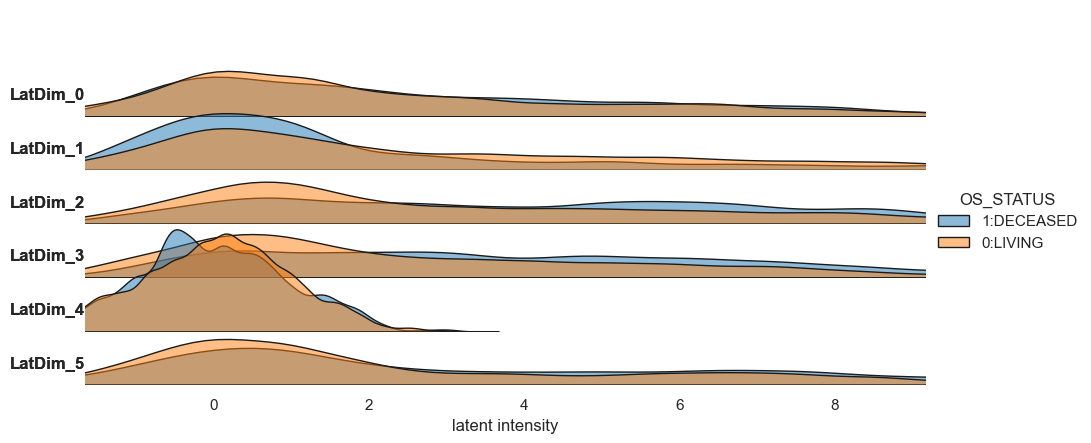

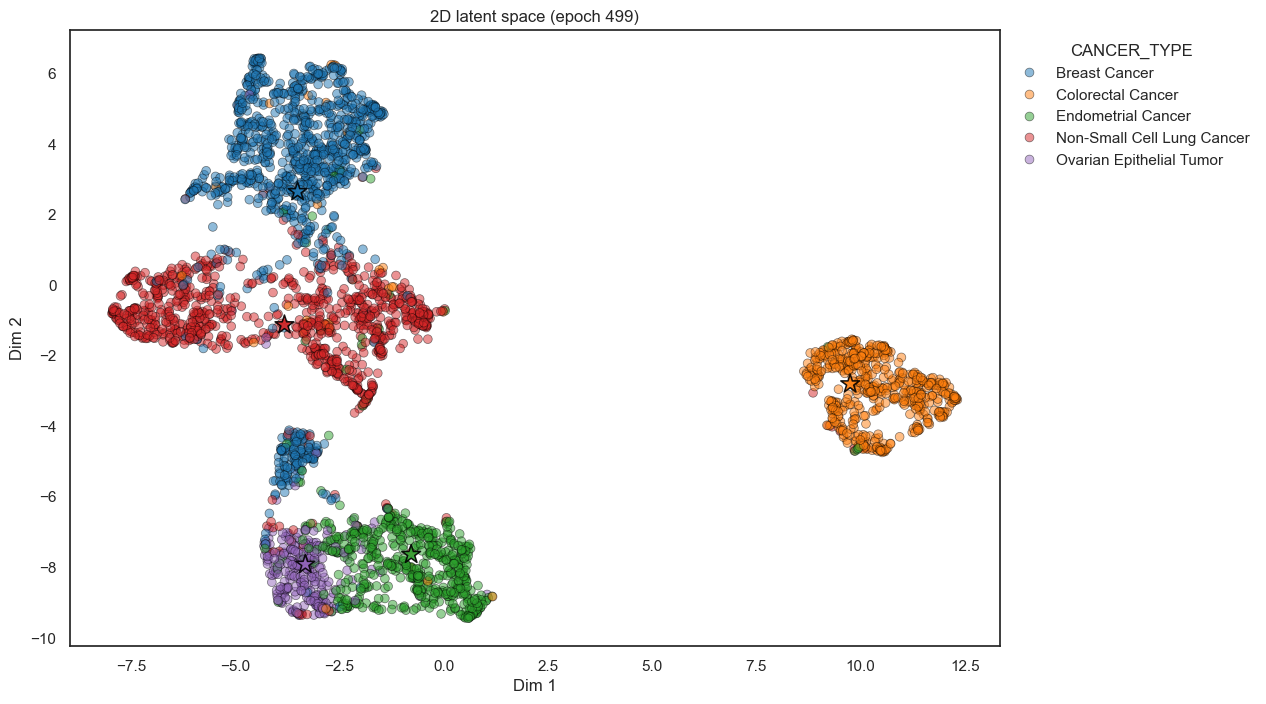

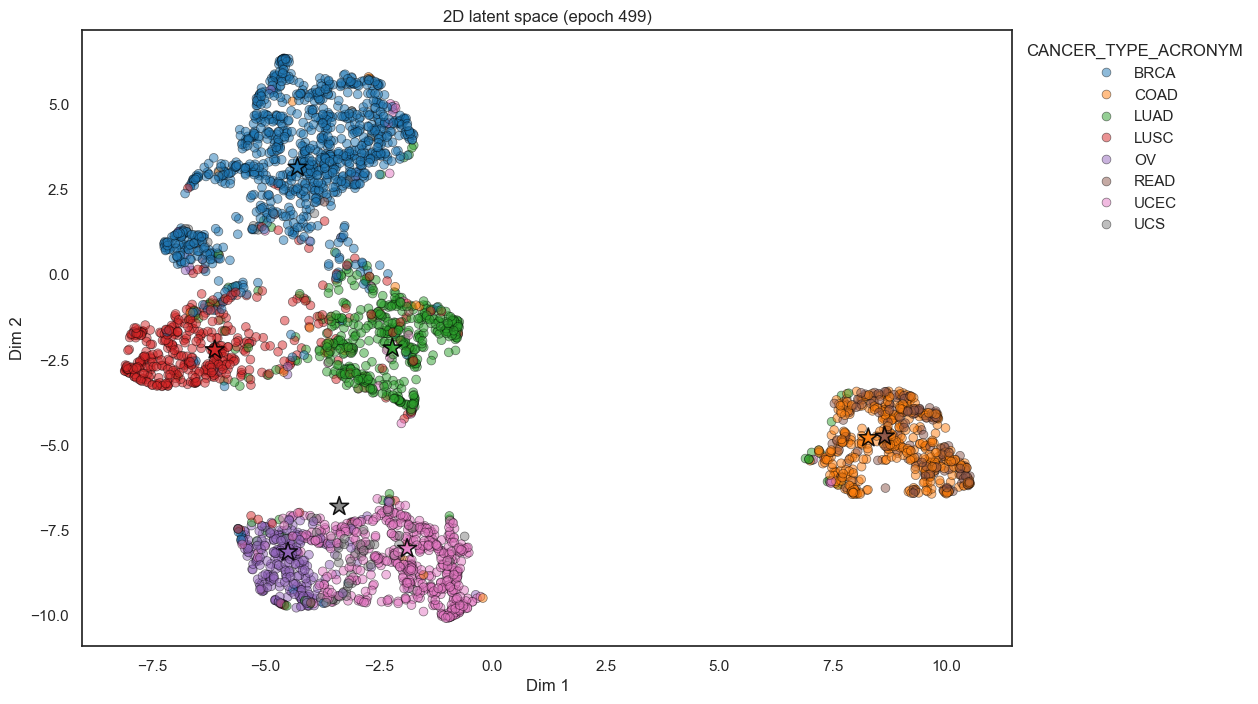

The provided label column is numeric and converted to categories.


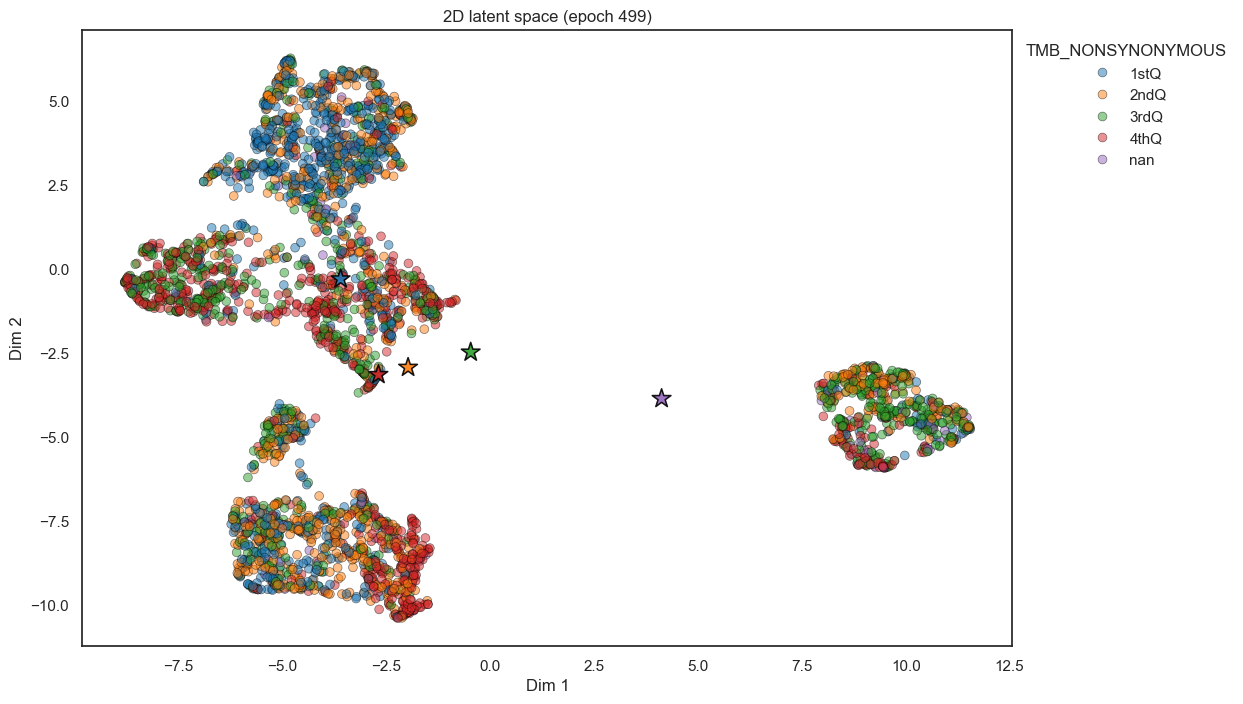

The provided label column is numeric and converted to categories.


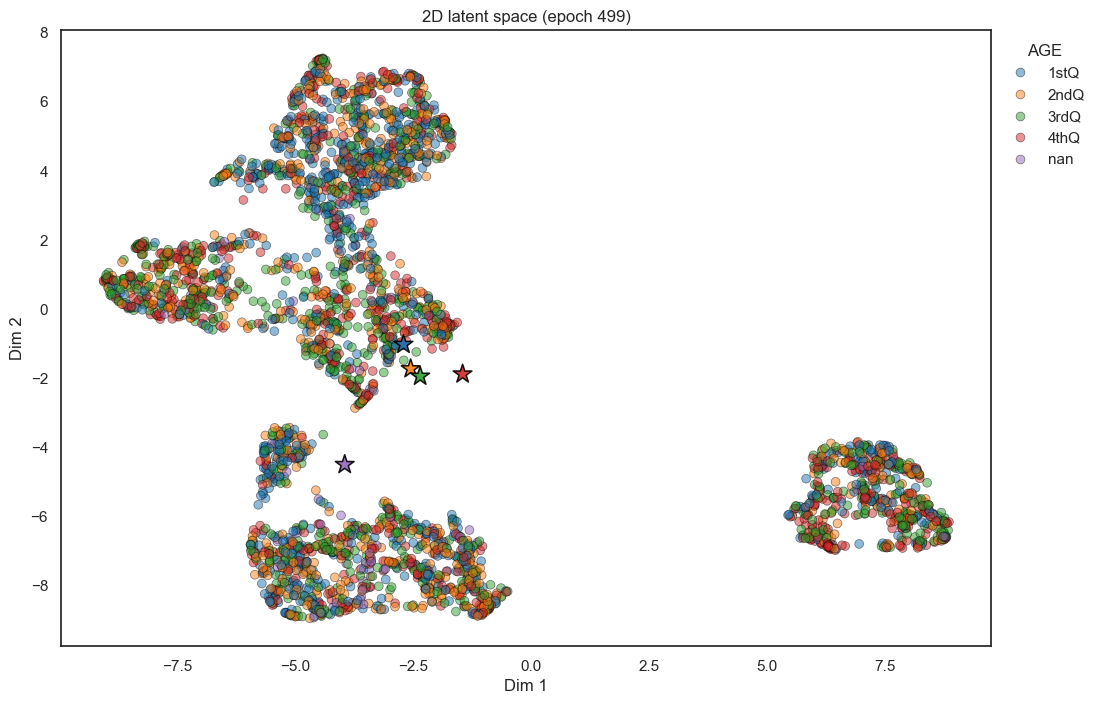

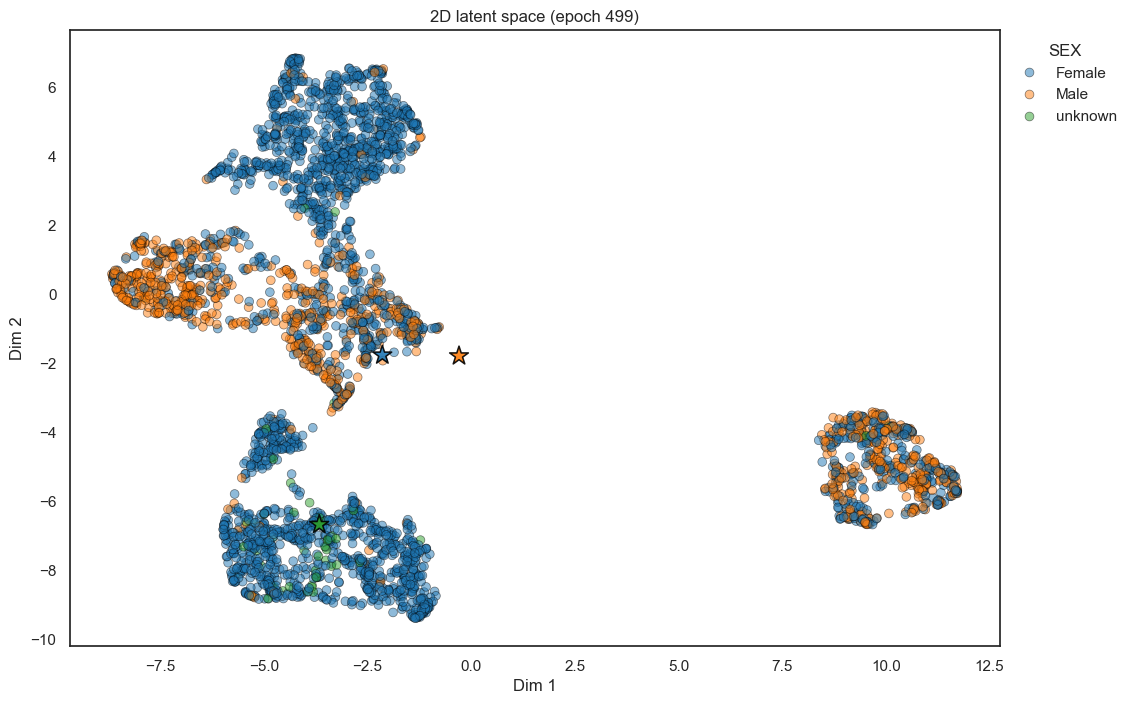

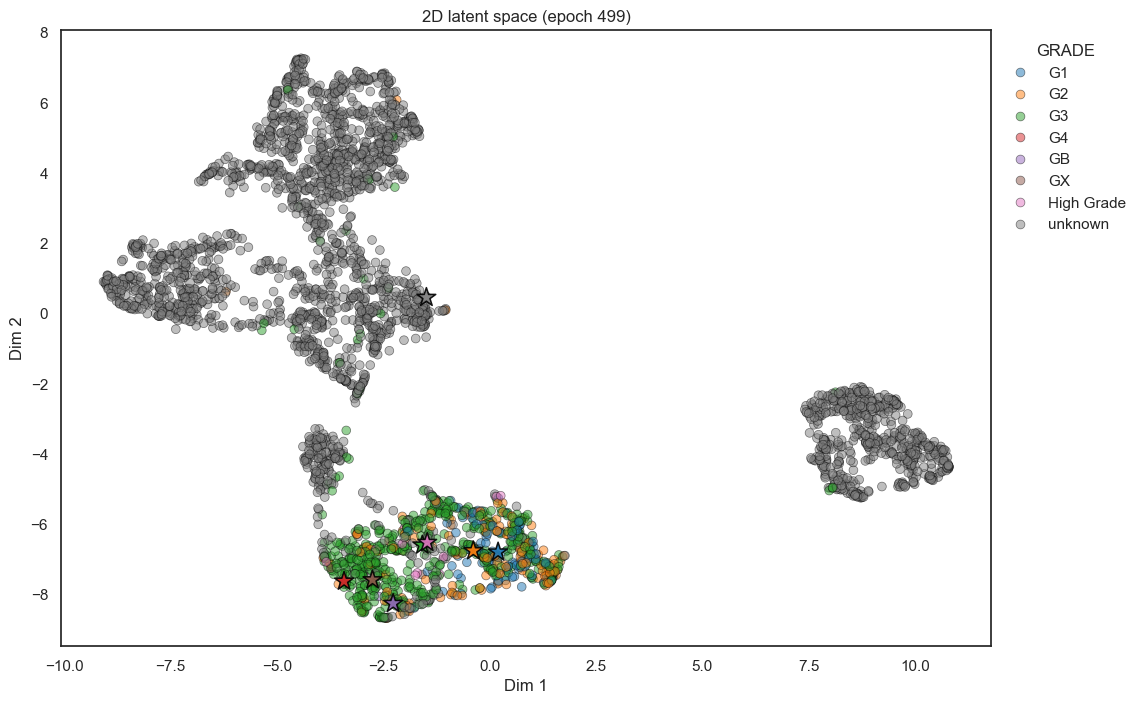

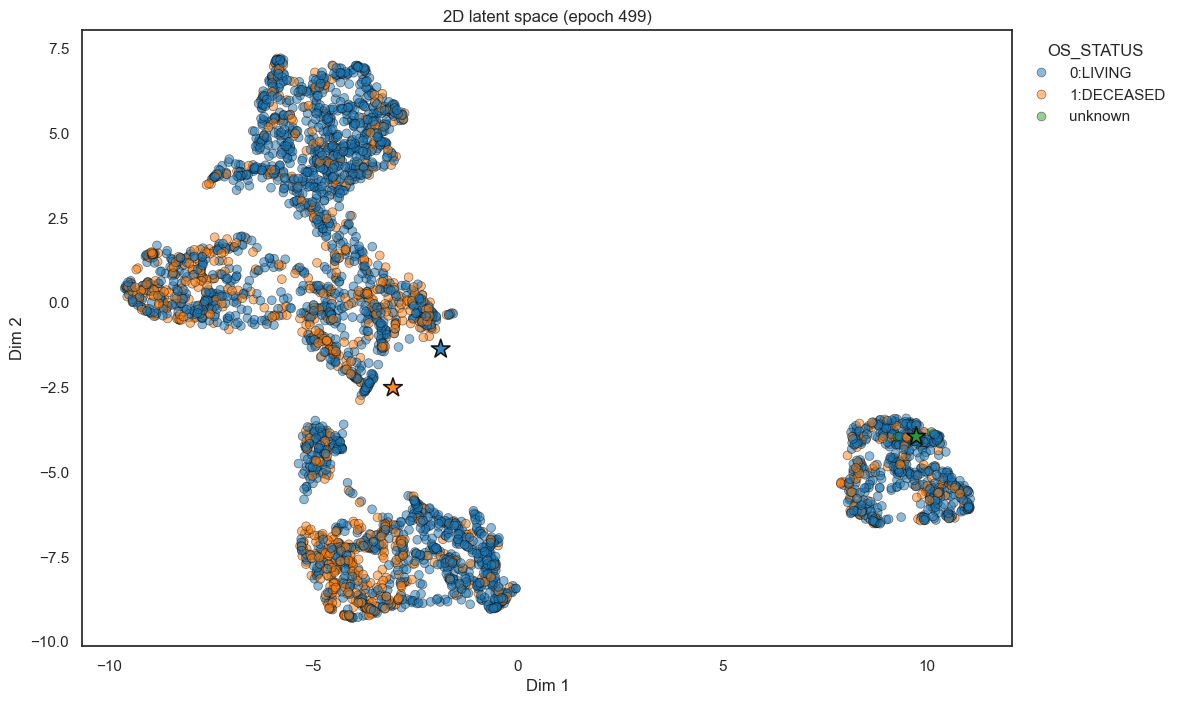

In [9]:

varix.show_result()